   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

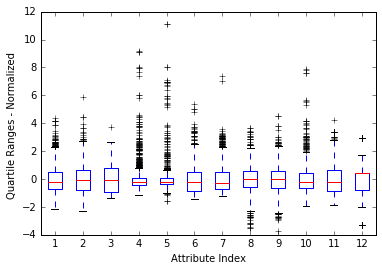

In [1]:
import pandas as pd
from pandas import DataFrame
from pylab import *
import matplotlib.pyplot as plot
%matplotlib inline

target_url = ("http://archive.ics.uci.edu/ml/machine-"
 "learning-databases/wine-quality/winequality-red.csv")

wine = pd.read_csv(target_url,header=0, sep=";")

print(wine.head())

#generate statistical summaries
summary = wine.describe()
print(summary)

wineNormalized = wine
ncols = len(wineNormalized.columns)

for i in range(ncols):
    mean = summary.iloc[1, i]
    sd = summary.iloc[2, i]
    wineNormalized.iloc[:,i:(i + 1)] = \
        (wineNormalized.iloc[:,i:(i + 1)] - mean) / sd

array = wineNormalized.values
boxplot(array)
plot.xlabel("Attribute Index")
plot.ylabel(("Quartile Ranges - Normalized "))
show()


# Producing a Parallel Coordinate Plot for Wine Data

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


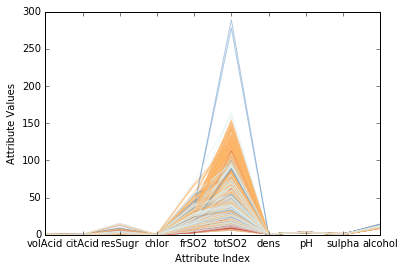

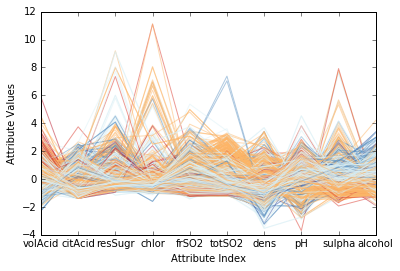

In [2]:
from math import exp

target_url = ("http://archive.ics.uci.edu/ml/machine-"
 "learning-databases/wine-quality/winequality-red.csv")

wine = pd.read_csv(target_url,header=0, sep=";")

#print column names in order to have the full versions
print(wine.columns)

#change column names to shorter ones to fit graph
wine.columns = ['fixAcid', 'volAcid', 'citAcid',
    'resSugr', 'chlor', 'frSO2', 'totSO2',
    'dens', 'pH', 'sulpha', 'alcohol', 'quality']

#generate statistical summaries
summary = wine.describe()
nrows = len(wine.index)
tasteCol = len(summary.columns)
meanTaste = summary.iloc[1,tasteCol - 1]
sdTaste = summary.iloc[2,tasteCol - 1]
nDataCol = len(wine.columns) -1

for i in range(nrows):
    #plot rows of data as if they were series data
    dataRow = wine.iloc[i,1:nDataCol]
    normTarget = (wine.iloc[i,nDataCol] - meanTaste)/sdTaste
    labelColor = 1.0/(1.0 + exp(-normTarget))
    dataRow.plot(color=plot.cm.RdYlBu(labelColor), alpha=0.5)

plot.xlabel("Attribute Index")
plot.ylabel(("Attribute Values"))
plot.show()

wineNormalized = wine
ncols = len(wineNormalized.columns)

for i in range(ncols):
    mean = summary.iloc[1, i]
    sd = summary.iloc[2, i]
    wineNormalized.iloc[:,i:(i + 1)] = \
        (wineNormalized.iloc[:,i:(i + 1)] - mean) / sd

#Try again with normalized values
for i in range(nrows):
    #plot rows of data as if they were series data
    dataRow = wineNormalized.iloc[i,1:nDataCol]
    normTarget = wineNormalized.iloc[i,nDataCol]
    labelColor = 1.0/(1.0 + exp(-normTarget))
    dataRow.plot(color=plot.cm.RdYlBu(labelColor), alpha=0.5)

plot.xlabel("Attribute Index")
plot.ylabel(("Attribute Values"))

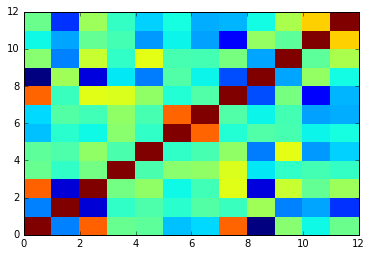

In [3]:
target_url = ("http://archive.ics.uci.edu/ml/machine-"
              "learning-databases/wine-quality/winequality-red.csv")
wine = pd.read_csv(target_url,header=0, sep=";")
wineCols = len(wine.columns)

#calculate correlation matrix
corMat = DataFrame(wine.corr())

#visualize correlations using heatmap
plot.pcolor(corMat)
plot.show()

# Forward Stepwise Regression

Out of sample error versus attribute set size
[0.72342592551162777, 0.68609931528371959, 0.67343650334202776, 0.66770332138977961, 0.6622558568522271, 0.65900047541546247, 0.65727172061430761, 0.65709058062076997, 0.65699930964461373, 0.65758189400434741, 0.65739098690113384]

Best attribute indices
[10, 1, 9, 4, 6, 8, 5, 3, 2, 7, 0]

Best attribute names
['"alcohol"', '"volatile acidity"', '"sulphates"', '"chlorides"', '"total sulfur dioxide"', '"pH"', '"free sulfur dioxide"', '"residual sugar"', '"citric acid"', '"density"', '"fixed acidity"']


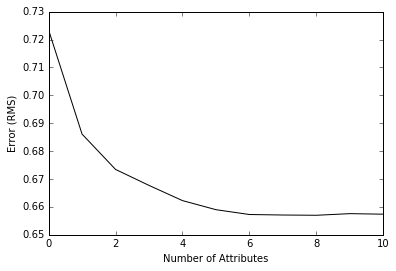

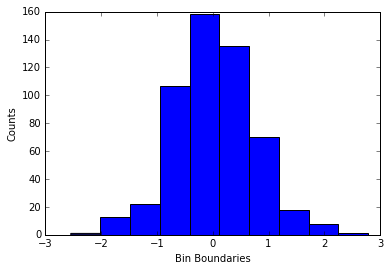

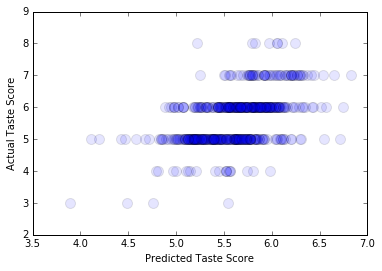

In [6]:
import numpy
from sklearn import datasets, linear_model
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline
import urllib
from urllib.request import urlopen
import sys
#read data from uci data repository
target_url = urllib.request.Request("http://archive.ics.uci.edu/ml/machine-"
              "learning-databases/wine-quality/winequality-red.csv")
data = urlopen(target_url)

def xattrSelect(x, idxSet):
    #takes X matrix as list of list and returns subset containing columns in idxSet
    xOut = []
    for row in x:
        xOut.append([row[i] for i in idxSet])
    return(xOut)


xList = []
labels = []
names = []
firstLine = True
for line in data:
    if firstLine:
        names = line.strip().decode().split(";")
        firstLine = False
    else:
        #split on semi-colon
        row = line.strip().decode().split(";")
        #put labels in separate array
        labels.append(float(row[-1]))
        #remove label from row
        row.pop()
        #convert row to floats
        floatRow = [float(num) for num in row]
        xList.append(floatRow)

#divide attributes and labels into training and test sets
indices = range(len(xList))
xListTest = [xList[i] for i in indices if i%3 == 0 ]
xListTrain = [xList[i] for i in indices if i%3 != 0 ]
labelsTest = [labels[i] for i in indices if i%3 == 0]
labelsTrain = [labels[i] for i in indices if i%3 != 0]

#build list of attributes one-at-a-time - starting with empty
attributeList = []
index = range(len(xList[1]))
indexSet = set(index)
indexSeq = []
oosError = []

for i in index:
    attSet = set(attributeList)
    #attributes not in list already
    attTrySet = indexSet - attSet
    #form into list
    attTry = [ii for ii in attTrySet]
    errorList = []
    attTemp = []
    #try each attribute not in set to see which one gives least oos error
    for iTry in attTry:
        attTemp = [] + attributeList
        attTemp.append(iTry)
        #use attTemp to form training and testing sub matrices as list of lists
        xTrainTemp = xattrSelect(xListTrain, attTemp)
        xTestTemp = xattrSelect(xListTest, attTemp)
        #form into numpy arrays
        xTrain = numpy.array(xTrainTemp); yTrain = numpy.array(labelsTrain); xTest = numpy.array(xTestTemp); yTest = numpy.array(labelsTest)
        #use sci-kit learn linear regression
        wineQModel = linear_model.LinearRegression()
        wineQModel.fit(xTrain,yTrain)
        #use trained model to generate prediction and calculate rmsError
        rmsError = numpy.linalg.norm((yTest-wineQModel.predict(xTest)), 2)/sqrt(len(yTest))
        errorList.append(rmsError)
        attTemp = []

    iBest = numpy.argmin(errorList)
    attributeList.append(attTry[iBest])
    oosError.append(errorList[iBest])

print("Out of sample error versus attribute set size" )
print(oosError)
print("\n" + "Best attribute indices")
print(attributeList)
namesList = [names[i] for i in attributeList]
print("\n" + "Best attribute names")
print(namesList)

#Plot error versus number of attributes
x = range(len(oosError))
plt.plot(x, oosError, 'k')
plt.xlabel('Number of Attributes')
plt.ylabel('Error (RMS)')
plt.show()

#Plot histogram of out of sample errors for best number of attributes
#Identify index corresponding to min value, retrain with the corresponding attributes
#Use resulting model to predict against out of sample data.  Plot errors (aka residuals)
indexBest = oosError.index(min(oosError))
attributesBest = attributeList[1:(indexBest+1)]

#Define column-wise subsets of xListTrain and xListTest and convert to numpy
xTrainTemp = xattrSelect(xListTrain, attributesBest)
xTestTemp = xattrSelect(xListTest, attributesBest)
xTrain = numpy.array(xTrainTemp); xTest = numpy.array(xTestTemp)

#train and plot error histogram
wineQModel = linear_model.LinearRegression()
wineQModel.fit(xTrain,yTrain)
errorVector = yTest-wineQModel.predict(xTest)
plt.hist(errorVector)
plt.xlabel("Bin Boundaries")
plt.ylabel("Counts")
plt.show()

#scatter plot of actual versus predicted
plt.scatter(wineQModel.predict(xTest), yTest, s=100, alpha=0.10)
plt.xlabel('Predicted Taste Score')
plt.ylabel('Actual Taste Score')
plt.show()


# Predicting Wine Taste with Ridge Regression

RMS Error             alpha
0.659578817634 1.0
0.657861091881 0.1
0.657617214464 0.010000000000000002
0.657521648264 0.0010000000000000002
0.657419068011 0.00010000000000000002
0.657394162885 1.0000000000000003e-05
0.657391308716 1.0000000000000004e-06


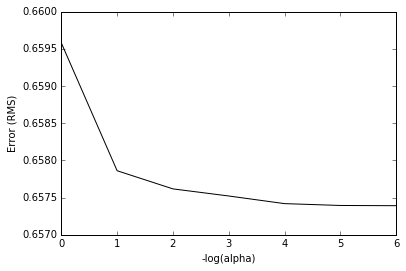

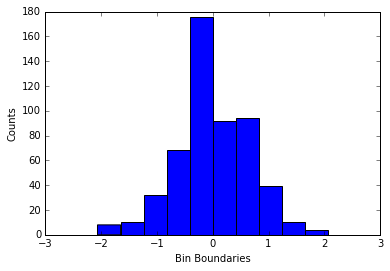

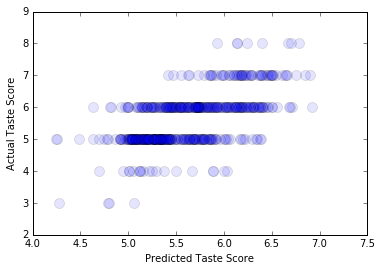

In [1]:
import numpy
from sklearn import datasets, linear_model
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline
import urllib
from urllib.request import urlopen
import sys
#read data from uci data repository
target_url = urllib.request.Request("http://archive.ics.uci.edu/ml/machine-"
              "learning-databases/wine-quality/winequality-red.csv")
data = urlopen(target_url)

xList = []
labels = []
names = []
firstLine = True
for line in data:
    if firstLine:
        names = line.strip().decode().split(";")
        firstLine = False
    else:
        #split on semi-colon
        row = line.strip().decode().split(";")
        #put labels in separate array
        labels.append(float(row[-1]))
        #remove label from row
        row.pop()
        #convert row to floats
        floatRow = [float(num) for num in row]
        xList.append(floatRow)

#divide attributes and labels into training and test sets
indices = range(len(xList))
xListTest = [xList[i] for i in indices if i%3 == 0 ]
xListTrain = [xList[i] for i in indices if i%3 != 0 ]
labelsTest = [labels[i] for i in indices if i%3 == 0]
labelsTrain = [labels[i] for i in indices if i%3 != 0]

xTrain = numpy.array(xListTrain); yTrain = numpy.array(labelsTrain); xTest = numpy.array(xListTest); yTest = numpy.array(labelsTest)

alphaList = [0.1**i for i in [0,1, 2, 3, 4, 5, 6]]

rmsError = []
for alph in alphaList:
    wineRidgeModel = linear_model.Ridge(alpha=alph)
    wineRidgeModel.fit(xTrain, yTrain)
    rmsError.append(numpy.linalg.norm((yTest-wineRidgeModel.predict(xTest)), 2)/sqrt(len(yTest)))

print("RMS Error             alpha")
for i in range(len(rmsError)):
    print(rmsError[i], alphaList[i])

#plot curve of out-of-sample error versus alpha
x = range(len(rmsError))
plt.plot(x, rmsError, 'k')
plt.xlabel('-log(alpha)')
plt.ylabel('Error (RMS)')
plt.show()

#Plot histogram of out of sample errors for best alpha value and scatter plot of actual versus predicted
#Identify index corresponding to min value, retrain with the corresponding value of alpha
#Use resulting model to predict against out of sample data.  Plot errors (aka residuals)
indexBest = rmsError.index(min(rmsError))
alph = alphaList[indexBest]
wineRidgeModel = linear_model.Ridge(alpha=alph)
wineRidgeModel.fit(xTrain, yTrain)
errorVector = yTest-wineRidgeModel.predict(xTest)
plt.hist(errorVector)
plt.xlabel("Bin Boundaries")
plt.ylabel("Counts")
plt.show()

plt.scatter(wineRidgeModel.predict(xTest), yTest, s=100, alpha=0.10)
plt.xlabel('Predicted Taste Score')
plt.ylabel('Actual Taste Score')
plt.show()



# LARS Algorithm

['"alcohol"', '"volatile acidity"', '"sulphates"', '"total sulfur dioxide"', '"chlorides"', '"fixed acidity"', '"pH"', '"free sulfur dioxide"', '"citric acid"', '"residual sugar"', '"density"']


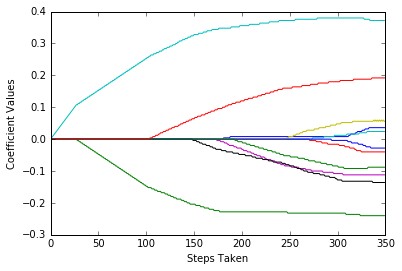

In [3]:
import matplotlib.pyplot as plot
%matplotlib inline
#Normalize columns in x and labels

nrows = len(xList)
ncols = len(xList[0])

#calculate means and variances
xMeans = []
xSD = []
for i in range(ncols):
    col = [xList[j][i] for j in range(nrows)]
    mean = sum(col)/nrows
    xMeans.append(mean)
    colDiff = [(xList[j][i] - mean) for j in range(nrows)]
    sumSq = sum([colDiff[i] * colDiff[i] for i in range(nrows)])
    stdDev = sqrt(sumSq/nrows)
    xSD.append(stdDev)

#use calculate mean and standard deviation to normalize xList
xNormalized = []
for i in range(nrows):
    rowNormalized = [(xList[i][j] - xMeans[j])/xSD[j] for j in range(ncols)]
    xNormalized.append(rowNormalized)

#Normalize labels
meanLabel = sum(labels)/nrows
sdLabel = sqrt(sum([(labels[i] - meanLabel) * (labels[i] - meanLabel) for i in range(nrows)])/nrows)

labelNormalized = [(labels[i] - meanLabel)/sdLabel for i in range(nrows)]

#initialize a vector of coefficients beta
beta = [0.0] * ncols

#initialize matrix of betas at each step
betaMat = []
betaMat.append(list(beta))


#number of steps to take
nSteps = 350
stepSize = 0.004
nzList = []

for i in range(nSteps):
    #calculate residuals
    #Residual means difference between the observed outcome and predicted outcome. same as error
    residuals = [0.0] * nrows
    for j in range(nrows):
        labelsHat = sum([xNormalized[j][k] * beta[k] for k in range(ncols)])
        residuals[j] = labelNormalized[j] - labelsHat

    #calculate correlation between attribute columns from normalized wine and residual
    corr = [0.0] * ncols

    for j in range(ncols):
        corr[j] = sum([xNormalized[k][j] * residuals[k] for k in range(nrows)]) / nrows

    iStar = 0
    corrStar = corr[0]

    for j in range(1, (ncols)):
        if abs(corrStar) < abs(corr[j]):
            iStar = j; corrStar = corr[j]

    beta[iStar] += stepSize * corrStar / abs(corrStar)
    betaMat.append(list(beta))


    nzBeta = [index for index in range(ncols) if beta[index] != 0.0]
    for q in nzBeta:
        if (q in nzList) == False:
            nzList.append(q)

nameList = [names[nzList[i]] for i in range(len(nzList))]

print(nameList)
for i in range(ncols):
    #plot range of beta values for each attribute
    coefCurve = [betaMat[k][i] for k in range(nSteps)]
    xaxis = range(nSteps)
    plot.plot(xaxis, coefCurve)

plot.xlabel("Steps Taken")
plot.ylabel(("Coefficient Values"))
plot.show()

# Choosing the best model/Fold Cross-Validation to determine Best Set of Coefficients

Minimum Mean Square Error 0.5873018933136459
Index of Minimum Mean Square Error 311


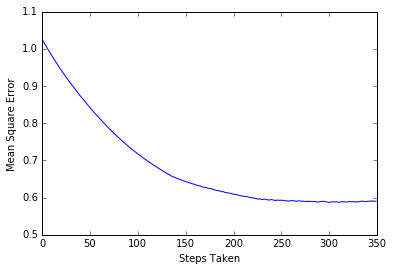

In [4]:
#Normalize columns in x and labels

nrows = len(xList)
ncols = len(xList[0])

#calculate means and variances
xMeans = []
xSD = []
for i in range(ncols):
    col = [xList[j][i] for j in range(nrows)]
    mean = sum(col)/nrows
    xMeans.append(mean)
    colDiff = [(xList[j][i] - mean) for j in range(nrows)]
    sumSq = sum([colDiff[i] * colDiff[i] for i in range(nrows)])
    stdDev = sqrt(sumSq/nrows)
    xSD.append(stdDev)

#use calculated mean and standard deviation to normalize xList
xNormalized = []
for i in range(nrows):
    rowNormalized = [(xList[i][j] - xMeans[j])/xSD[j] for j in range(ncols)]
    xNormalized.append(rowNormalized)

#Normalize labels
meanLabel = sum(labels)/nrows
sdLabel = sqrt(sum([(labels[i] - meanLabel) * (labels[i] - meanLabel) for i in range(nrows)])/nrows)

labelNormalized = [(labels[i] - meanLabel)/sdLabel for i in range(nrows)]

#Build cross-validation loop to determine best coefficient values.

#number of cross validation folds
nxval = 10

#number of steps and step size
nSteps = 350
stepSize = 0.004

#initialize list for storing errors.
errors = []
for i in range(nSteps):
    b = []
    errors.append(b)


for ixval in range(nxval):
    #Define test and training index sets
    idxTest = [a for a in range(nrows) if a%nxval == ixval*nxval]
    idxTrain = [a for a in range(nrows) if a%nxval != ixval*nxval]

    #Define test and training attribute and label sets
    xTrain = [xNormalized[r] for r in idxTrain]
    xTest = [xNormalized[r] for r in idxTest]
    labelTrain = [labelNormalized[r] for r in idxTrain]
    labelTest = [labelNormalized[r] for r in idxTest]

    #Train LARS regression on Training Data
    nrowsTrain = len(idxTrain)
    nrowsTest = len(idxTest)

    #initialize a vector of coefficients beta
    beta = [0.0] * ncols

    #initialize matrix of betas at each step
    betaMat = []
    betaMat.append(list(beta))

    for iStep in range(nSteps):
        #calculate residuals
        residuals = [0.0] * nrows
        for j in range(nrowsTrain):
            labelsHat = sum([xTrain[j][k] * beta[k] for k in range(ncols)])
            residuals[j] = labelTrain[j] - labelsHat

        #calculate correlation between attribute columns from normalized wine and residual
        corr = [0.0] * ncols

        for j in range(ncols):
            corr[j] = sum([xTrain[k][j] * residuals[k] for k in range(nrowsTrain)]) / nrowsTrain

        iStar = 0
        corrStar = corr[0]

        for j in range(1, (ncols)):
            if abs(corrStar) < abs(corr[j]):
                iStar = j; corrStar = corr[j]

        beta[iStar] += stepSize * corrStar / abs(corrStar)
        betaMat.append(list(beta))

        #Use beta just calculated to predict and accumulate out of sample error - not being used in the calc of beta
        for j in range(nrowsTest):
            labelsHat = sum([xTest[j][k] * beta[k] for k in range(ncols)])
            err = labelTest[j] - labelsHat
            errors[iStep].append(err)

cvCurve = []
for errVect in errors:
    mse = sum([x*x for x in errVect])/len(errVect)
    cvCurve.append(mse)

minMse = min(cvCurve)
minPt = [i for i in range(len(cvCurve)) if cvCurve[i] == minMse ][0]
print("Minimum Mean Square Error", minMse)
print("Index of Minimum Mean Square Error", minPt)

xaxis = range(len(cvCurve))
plot.plot(xaxis, cvCurve)

plot.xlabel("Steps Taken")
plot.ylabel(("Mean Square Error"))
plot.show()


# Glmnet Algorithm

0 2
1 2
2 2
3 3
4 3
5 3
6 3
7 3
8 3
9 2
10 2
11 2
12 2
13 3
14 3
15 2
16 2
17 2
18 2
19 2
20 2
21 2
22 2
23 2
24 2
25 2
26 2
27 2
28 2
29 3
30 3
31 3
32 2
33 3
34 2
35 2
36 2
37 2
38 2
39 2
40 2
41 2
42 1
43 1
44 2
45 2
46 2
47 1
48 2
49 1
50 1
51 1
52 1
53 1
54 1
55 1
56 1
57 1
58 1
59 1
60 1
61 1
62 1
63 1
64 1
65 1
66 1
67 1
68 1
69 1
70 1
71 1
72 1
73 1
74 1
75 1
76 1
77 1
78 1
79 1
80 1
81 1
82 1
83 1
84 1
85 1
86 1
87 1
88 1
89 1
90 1
91 1
92 1
93 1
94 1
95 1
96 1
97 1
98 1
99 1
['"alcohol"', '"volatile acidity"', '"sulphates"', '"total sulfur dioxide"', '"chlorides"', '"fixed acidity"', '"pH"', '"free sulfur dioxide"', '"residual sugar"', '"citric acid"', '"density"']


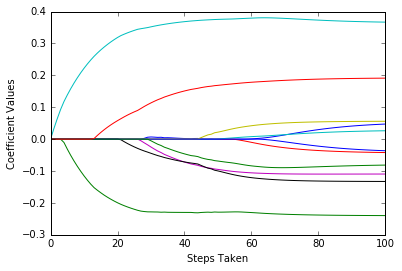

In [6]:
def S(z, gamma):
    if gamma >= abs(z):
        return 0.0
    return (z/abs(z))*(abs(z) - gamma)

#Normalize columns in x and labels

nrows = len(xList)
ncols = len(xList[0])

#calculate means and variances
xMeans = []
xSD = []
for i in range(ncols):
    col = [xList[j][i] for j in range(nrows)]
    mean = sum(col)/nrows
    xMeans.append(mean)
    colDiff = [(xList[j][i] - mean) for j in range(nrows)]
    sumSq = sum([colDiff[i] * colDiff[i] for i in range(nrows)])
    stdDev = sqrt(sumSq/nrows)
    xSD.append(stdDev)

#use calculate mean and standard deviation to normalize xList
xNormalized = []
for i in range(nrows):
    rowNormalized = [(xList[i][j] - xMeans[j])/xSD[j]
                     for j in range(ncols)]
    xNormalized.append(rowNormalized)

#Normalize labels
meanLabel = sum(labels)/nrows
sdLabel = sqrt(sum([(labels[i] - meanLabel) * (labels[i] -
                meanLabel) for i in range(nrows)])/nrows)

labelNormalized = [(labels[i] - meanLabel)/sdLabel for i in range(nrows)]

#select value for alpha parameter

alpha = 1.0

#make a pass through the data to determine value of lambda that
# just suppresses all coefficients.
#start with betas all equal to zero.


xy = [0.0]*ncols
for i in range(nrows):
    for j in range(ncols):
        xy[j] += xNormalized[i][j] * labelNormalized[i]

maxXY = 0.0
for i in range(ncols):
    val = abs(xy[i])/nrows
    if val > maxXY:
        maxXY = val

#calculate starting value for lambda
lam = maxXY/alpha

#this value of lambda corresponds to beta = list of 0's
#initialize a vector of coefficients beta
beta = [0.0] * ncols

#initialize matrix of betas at each step
betaMat = []
betaMat.append(list(beta))

#begin iteration
nSteps = 100
lamMult = 0.93 #100 steps gives reduction by factor of 1000 in
               # lambda (recommended by authors)
nzList = []

for iStep in range(nSteps):
    #make lambda smaller so that some coefficient becomes non-zero
    lam = lam * lamMult

    deltaBeta = 100.0
    eps = 0.01
    iterStep = 0
    betaInner = list(beta)
    while deltaBeta > eps:
        iterStep += 1
        if iterStep > 100: break

        #cycle through attributes and update one-at-a-time
        #record starting value for comparison
        betaStart = list(betaInner)
        for iCol in range(ncols):

            xyj = 0.0
            for i in range(nrows):
                #calculate residual with current value of beta
                labelHat = sum([xNormalized[i][k]*betaInner[k]
                                for k in range(ncols)])
                residual = labelNormalized[i] - labelHat

                xyj += xNormalized[i][iCol] * residual

            uncBeta = xyj/nrows + betaInner[iCol]
            betaInner[iCol] = S(uncBeta, lam * alpha) / (1 +
                                            lam * (1 - alpha))

        sumDiff = sum([abs(betaInner[n] - betaStart[n])
                       for n in range(ncols)])
        sumBeta = sum([abs(betaInner[n]) for n in range(ncols)])
        deltaBeta = sumDiff/sumBeta
    print(iStep, iterStep)
    beta = betaInner

    #add newly determined beta to list
    betaMat.append(beta)

    #keep track of the order in which the betas become non-zero
    nzBeta = [index for index in range(ncols) if beta[index] != 0.0]
    for q in nzBeta:
        if (q in nzList) == False:
            nzList.append(q)

#print out the ordered list of betas
nameList = [names[nzList[i]] for i in range(len(nzList))]
print(nameList)

nPts = len(betaMat)
for i in range(ncols):
    #plot range of beta values for each attribute
    coefCurve = [betaMat[k][i] for k in range(nPts)]
    xaxis = range(nPts)
    plot.plot(xaxis, coefCurve)

plot.xlabel("Steps Taken")
plot.ylabel(("Coefficient Values"))
plot.show()



# Basis Expansion: getting linear model to work with strong non-linearities

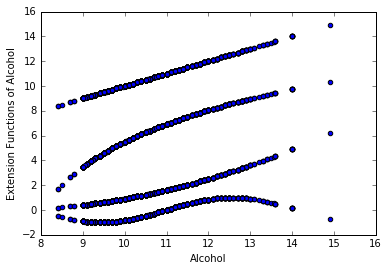

In [8]:
from math import sqrt, cos, log
#extend the alcohol variable (the last column in that attribute matrix
xExtended = []
alchCol = len(xList[1])


for row in xList:
    newRow = list(row)
    alch = row[alchCol - 1]
    newRow.append((alch - 7) * (alch - 7)/10)
    newRow.append(5 * log(alch - 7))
    newRow.append(cos(alch))
    xExtended.append(newRow)

nrow = len(xList)
v1 = [xExtended[j][alchCol - 1] for j in range(nrow)]

for i in range(4):
    v2 = [xExtended[j][alchCol - 1 + i] for j in range(nrow)]
    plot.scatter(v1,v2)

plot.xlabel("Alcohol")
plot.ylabel(("Extension Functions of Alcohol"))
plot.show()
